# Cells size experiment

Experimental design helps you decide the number of replicates you need to relibably detect effects in your experiment. 
In this example we going to look at changes in the size of cell by measuring it's area.

First we need to import some packages for doing maths and plotting

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 1. Measuring the size of the cells

The first step is to measure the area of the cells. Below is a phase contrast picture of the 3T3 cells before treatement.  The cells were detected in FIJI using a short script and the information about each Region of Interest (ROI) exported as a `.csv` file. 

![](detect.png)

# Reading in the data about the cells

The sizes from of the intial time points were saved into a set `.csv files` for each field of view and time point.  This code reads in the data and organises it into a nice neat table:

In [107]:
import glob
def group_files( time ):
    files = glob.glob("series*_t={}.csv".format(time))
    df_from_each_file = (pd.read_csv(f) for f in files)
    df = pd.concat(df_from_each_file, ignore_index=True)
    df["Time"]=time
    return df

df1 = group_files(1)
df4 = group_files(4)

df = pd.concat([df1,df4])
df['Time']=pd.Categorical(df['Time'])

In [106]:
df.head()

,,Area,X,Y,Perim.,BX,BY,Width,Height,Major,Minor,Angle,Circ.,AR,Round,Solidity,Time
0,1,495.783,273.210,55.699,146.244,258.924,35.208,30.440,38.875,35.397,17.834,117.459,0.291,1.985,0.504,0.695,1
1,2,463.502,472.280,64.761,114.873,453.667,53.178,37.042,24.572,30.632,19.266,23.603,0.441,1.590,0.629,0.732,1
2,3,414.542,347.846,82.791,130.669,331.174,73.716,41.443,19.071,36.408,14.497,4.068,0.305,2.511,0.398,0.643,1
3,4,1057.472,528.469,128.270,224.004,505.746,97.922,39.976,63.447,52.267,25.761,108.483,0.265,2.029,0.493,0.643,1
4,5,3867.265,446.777,163.193,998.925,379.584,100.122,136.797,122.494,129.187,38.115,129.794,0.049,3.389,0.295,0.466,1


## What is distrbution of the  size of the cells?

The first we need to know is what the spread or distribution of cell sizes are in the population.  Here are plots of the area of the cells for two time points

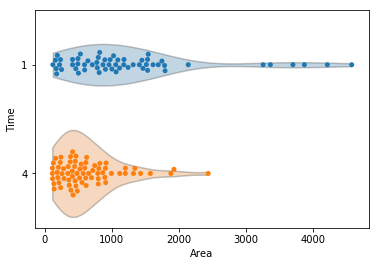

In [109]:
ax1 = sns.violinplot(x="Area",y='Time',cut=0,inner=None,data=df)
plt.setp(ax1.collections, alpha=.3)
ax2 = sns.swarmplot(x="Area",y='Time',data=df)


A common way to describe the size of cells is the log-normal distribution.  This is simply a normal distribution on a log scale.  

Compared to the more familar normal distribution, is more realisitic for describing the size of cells as it cannot be negative.

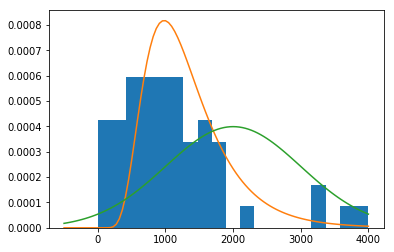

In [116]:
x = np.linspace(-500,4000,100)

plt.hist(df1['Area'], bins=np.linspace(0,4000,20),density=True)
plt.plot(x,stats.lognorm.pdf(x,0.45,scale=1200),label="log-normal")
plt.plot(x,stats.norm.pdf   (x,2000,scale=1000),label="log-normal")

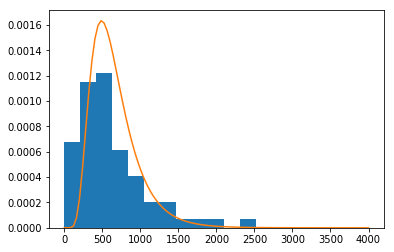

In [67]:
x = np.linspace(0,4000,100)
plt.hist(df4['Area'], bins=np.linspace(0,4000,20),density=True)
plt.plot(x,stats.lognorm.pdf(x,0.45,scale=600))

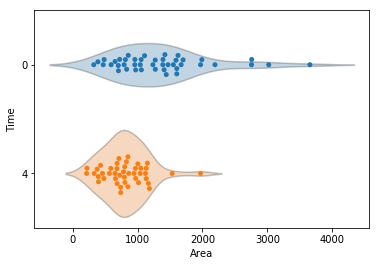

In [117]:
Nc = stats.poisson.rvs(65) ;       area_c = stats.lognorm.rvs( 0.45, scale=1200, size=Nc)
Nt = stats.poisson.rvs(65) ; Nt=Nc;area_t = stats.lognorm.rvs( 0.45, scale=800, size=Nt)
dfx = pd.concat(map(pd.DataFrame, [{'Area':area_c,'Time':0 },{'Area':area_t,'Time':4}]))
dfx['Time']=pd.Categorical(dfx['Time'])
ax1 = sns.violinplot(x="Area",y='Time',inner=None,data=dfx)
plt.setp(ax1.collections, alpha=.3)
ax2 = sns.swarmplot(x="Area",y='Time',data=dfx)

In [94]:
stats.ttest_ind(area_c, area_t)

Ttest_indResult(statistic=4.28724615049979, pvalue=3.530017388077208e-05)

In [95]:
stats.ttest_rel(area_c, area_t)

Ttest_relResult(statistic=4.0119707482645515, pvalue=0.00016021098785171955)